<a href="https://colab.research.google.com/github/AntonioC4r10s/TrilhaDadosJR-JUN15/blob/main/Cursos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### **1- Importando bibliotecas e carregando dados**

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
sns.set_style('whitegrid')

In [4]:
PATH_DATA = '/content/drive/MyDrive/Colab Notebooks/projects_github/TrilhaDadosJR-JUN15/dados-vendas.csv'
df_dados = pd.read_csv(PATH_DATA)
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    25 non-null     int64  
 1   Nome do Curso         25 non-null     object 
 2   Quantidade de Vendas  25 non-null     int64  
 3   Preço Unitário        25 non-null     float64
 4   Data                  25 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ KB


##### **2- Informações Básicas**

In [7]:
#@title ##### **Primeiras linhas**
df_dados.head()

,ID,Nome do Curso,Quantidade de Vendas,Preço Unitário,Data
0,1,Introdução à Programação em Python,50,39.9,2023-01-01
1,2,Desenvolvimento Web com HTML e CSS,30,59.9,2023-01-02
2,3,JavaScript Avançado: Frameworks e Bibliotecas,20,79.9,2023-01-03
3,4,Introdução ao Machine Learning,15,99.9,2023-01-04
4,5,Desenvolvimento Mobile com React Native,25,69.9,2023-01-05


In [9]:
#@title ##### **Número de linhas**
print(f'Número de linhas do dataset: {df_dados.shape[0]}')

Número de linhas do dataset: 25


In [17]:
#@title ##### **Número de colunas**
print(f'Número de colunas do dataset: {df_dados.shape[1]}')
print(f'{df_dados.keys()}')

Número de colunas do dataset: 5
Index(['ID', 'Nome do Curso', 'Quantidade de Vendas', 'Preço Unitário',
       'Data'],
      dtype='object')


##### **3- Estatísticas descritivas básicas**

In [26]:
#@title ##### **Média, mediana, mínimo, máximo e desvio padrão.**
vendas = df_dados['Quantidade de Vendas']
print(f'Média: {vendas.mean()}')
print(f'Mediana: {vendas.median()}')
print(f'Desvio padrão: {vendas.std():.2f}')
print(f'Mínimo: {vendas.min()}')
print(f'Máximo: {vendas.max()}')


Média: 17.96
Mediana: 15.0
Desvio padrão: 10.92
Mínimo: 5
Máximo: 50


##### **4- Visualização de dados**


In [39]:
#@title ##### **Separando dados por nome do curso**

df_cursos = df_dados.groupby('Nome do Curso')['Quantidade de Vendas'].sum().reset_index()
df_cursos.head()

,Nome do Curso,Quantidade de Vendas
0,Arquitetura de Microserviços,30
1,Banco de Dados SQL e NoSQL,30
2,Cloud Computing com AWS,37
3,Desenvolvimento Mobile com React Native,63
4,Desenvolvimento Web com HTML e CSS,75


<ipython-input-46-e38c8c1b27f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nome do Curso', y='Quantidade de Vendas', data=df_cursos, palette='Set1')


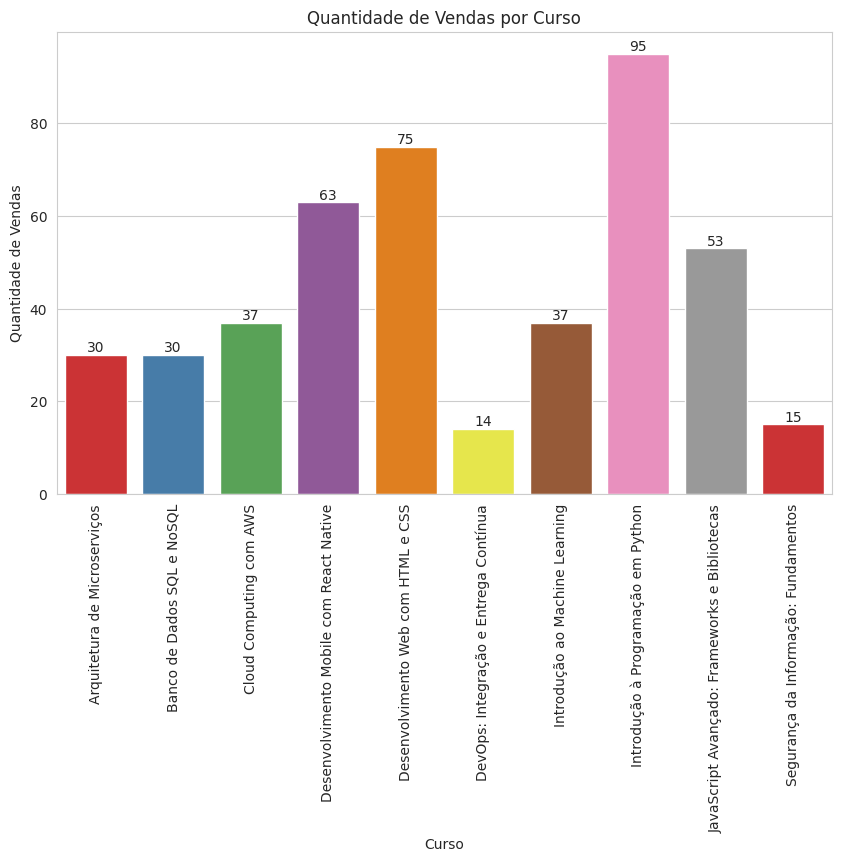

In [46]:
#@title ##### **Grafico de contagem de categorias**

plt.figure(figsize=(10, 6))
sns.barplot(x='Nome do Curso', y='Quantidade de Vendas', data=df_cursos, palette='Set1')

for index, value in enumerate(df_cursos['Quantidade de Vendas']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.xlabel('Curso')
plt.ylabel('Quantidade de Vendas')
plt.title('Quantidade de Vendas por Curso')
plt.show()

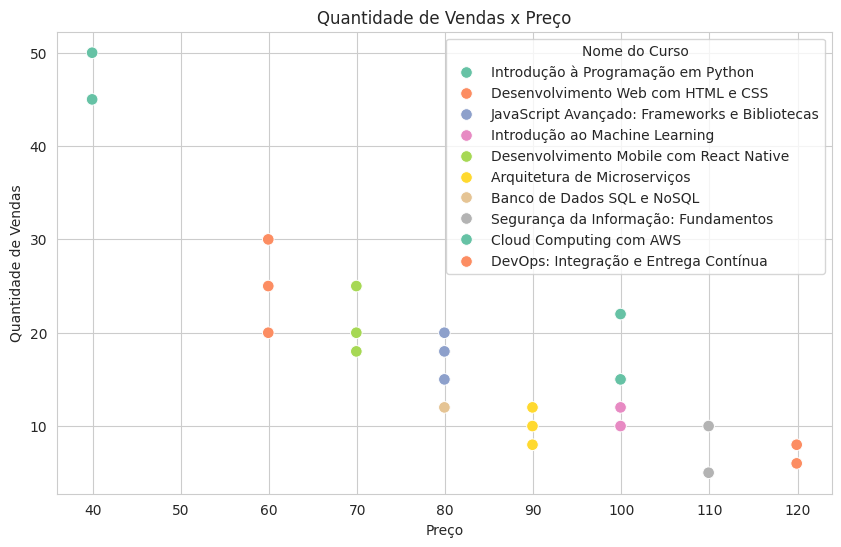

In [53]:
#@title ##### **Grafico de dispersão quanttidade vendas x preço**

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Preço Unitário', y='Quantidade de Vendas',
                hue='Nome do Curso', data=df_dados, palette='Set2', s=70)
plt.xlabel('Preço')
plt.ylabel('Quantidade de Vendas')
plt.title('Quantidade de Vendas x Preço')
plt.show()

##### **5- Desafios Propostos**


In [65]:
#@title ##### **Calcular a receita total gerada pela venda dos cursos.**

print(f'Receita total: R$ {sum(df_dados["Preço Unitário"] * df_dados["Quantidade de Vendas"]):.2f}')

Receita total: R$ 32735.10


In [66]:
#@title ##### **Identificar o curso com o maior número de vendas.**

df_cursos = df_cursos.sort_values(by='Quantidade de Vendas', ascending=False)

print(f'Curso com maior número de vendas: {df_cursos.iloc[0]["Nome do Curso"]} - {df_cursos.iloc[0]["Quantidade de Vendas"]} vendas')

Curso com maior número de vendas: Introdução à Programação em Python - 95 vendas


<ipython-input-73-d0cdb1aeb7ef>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Data', y='Quantidade de Vendas', data=df_tempo, marker='o', palette='Blues')


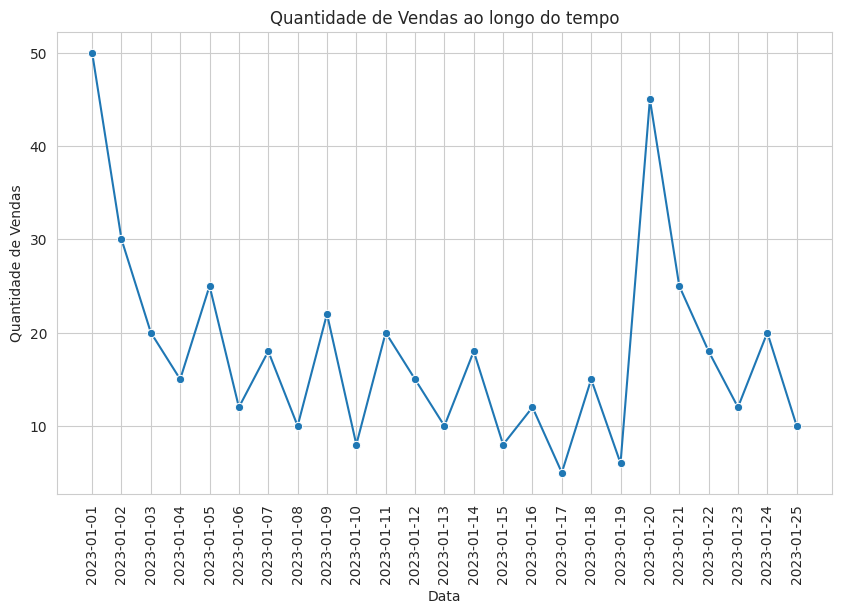

In [73]:
#@title ##### **Visualizar a distribuição das vendas ao longo do tempo através de gráficos.**

df_tempo = df_dados.groupby('Data')['Quantidade de Vendas'].sum().reset_index()
df_tempo.head()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Data', y='Quantidade de Vendas', data=df_tempo, marker='o', palette='Blues')
plt.xlabel('Data')
plt.ylabel('Quantidade de Vendas')
plt.title('Quantidade de Vendas ao longo do tempo')
plt.xticks(rotation=90)
plt.show()

